In [1]:
import pandas as pd
import sqlite3
import logging


In [2]:
conn=sqlite3.connect('inventory.db')

In [3]:
tables=pd.read_sql_query("SELECT name from sqlite_master WHERE type='table'",conn)

tables

,name
0,blinkit_customers
1,blinkit_customer_feedback
2,blinkit_delivery_performance
3,blinkit_inventory
4,blinkit_inventoryNew
5,blinkit_marketing_performance
6,blinkit_orders
7,blinkit_order_items
8,blinkit_products
9,blinkit_sales_summary


In [4]:
for table in tables['name']:
    print('-'*50,f'{table}','-'*50)
    print("count of record:", pd.read_sql(f"select count(*) as count from {table}",conn)['count'].values[0])

    display(pd.read_sql(f"select * from {table} limit 5",conn))

-------------------------------------------------- blinkit_customers --------------------------------------------------
count of record: 2500


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


-------------------------------------------------- blinkit_customer_feedback --------------------------------------------------
count of record: 5000


,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


-------------------------------------------------- blinkit_delivery_performance --------------------------------------------------
count of record: 5000


,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,None
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,None
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


-------------------------------------------------- blinkit_inventory --------------------------------------------------
count of record: 75172


,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


-------------------------------------------------- blinkit_inventoryNew --------------------------------------------------
count of record: 18105


,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


-------------------------------------------------- blinkit_marketing_performance --------------------------------------------------
count of record: 5400


,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


-------------------------------------------------- blinkit_orders --------------------------------------------------
count of record: 5000


,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


-------------------------------------------------- blinkit_order_items --------------------------------------------------
count of record: 5000


,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


-------------------------------------------------- blinkit_products --------------------------------------------------
count of record: 268


,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


-------------------------------------------------- blinkit_sales_summary --------------------------------------------------
count of record: 5000


,product_id,order_id,customer_id,customer_name,product_name,registration_date,order_date,quantity,order_total,category,...,customer_segment,total_orders,avg_order_value,shelf_life_days,min_stock_level,max_stock_level,Total_stock_received,Total_damaged_received,ProfitMargin,stockDamagRatio
0,803607,7997347191,31813,Indrajit Pau,Soap,2024-04-10 00:00:00,2024-07-11,3,4498.83,Personal Care,...,Regular,18,1230.75,365,21,98,608,296,511.39,0.486842
1,398340,5698803942,31813,Indrajit Pau,Instant Noodles,2024-04-10 00:00:00,2024-10-10,2,1227.21,Instant & Frozen Food,...,Regular,18,1230.75,180,11,56,579,313,434.62,0.540587
2,832348,4961370923,61020,Onkar Suresh,Biscuits,2024-07-27 00:00:00,2024-02-04,2,2560.30,Snacks & Munchies,...,New,19,1703.16,90,10,79,633,283,447.69,0.447077
3,305754,4283802879,61020,Onkar Suresh,Frozen Vegetables,2024-07-27 00:00:00,2023-05-10,1,2769.12,Instant & Frozen Food,...,New,19,1703.16,180,22,81,615,299,653.33,0.486179
4,611575,3367452972,61020,Onkar Suresh,Frozen Pizza,2024-07-27 00:00:00,2024-08-31,1,2515.48,Instant & Frozen Food,...,New,19,1703.16,180,25,87,606,308,321.37,0.508251


In [5]:
# combine order order_item and delivery_performance

In [6]:
orders=pd.read_sql_query("""SELECT
                o.customer_id,
                oI.product_id,
                o.order_id,
                oI.quantity,
                o.order_date,
                o.order_total,
                o.payment_method,
                d.delivery_status,
                d.reasons_if_delayed,
                cf.rating,
                cf.feedback_category,
                cf.sentiment
                FROM blinkit_orders o
                LEFT JOIN blinkit_order_items oI
                    ON o.order_id = oI.order_id
                LEFT JOIN blinkit_delivery_performance d
                    ON oI.order_id = d.order_id
                LEFT JOIN blinkit_customer_feedback cf
                    ON d.order_id = cf.order_id
                GROUP BY o.order_id, o.customer_id, o.order_date
                """,conn)
orders['order_date']=pd.to_datetime(orders['order_date'])
orders['order_date']=orders['order_date'].dt.date
orders['order_date']=pd.to_datetime(orders['order_date'])
orders['payment_method']

0          UPI
1       Wallet
2          UPI
3       Wallet
4       Wallet
         ...  
4995       UPI
4996       UPI
4997       UPI
4998      Card
4999      Card
Name: payment_method, Length: 5000, dtype: object

In [7]:
# combine tables products inventory and inventoryNew

In [8]:
inventory=pd.read_sql_query(
    """
    SELECT
        product_id,
        SUM(t.stock_received) AS Total_stock_received,
        SUM(t.damaged_stock) AS Total_damaged_received
    FROM (
        SELECT product_id, stock_received, damaged_stock FROM blinkit_inventory
        UNION ALL
        SELECT product_id, stock_received, damaged_stock FROM blinkit_inventoryNew
    ) t
    GROUP BY product_id;
    """,
    conn)
inventory

,product_id,Total_stock_received,Total_damaged_received
0,4452,769,306
1,6405,660,283
2,9436,402,289
3,11422,599,300
4,14145,659,296
...,...,...,...
263,970529,660,283
264,990993,550,298
265,991434,651,327
266,992178,784,316


In [9]:
# Combine customer and customer_feedback

In [13]:
customer=pd.read_sql_query("""
            SELECT
                customer_id,
                customer_name,
                customer_segment,
                registration_date,
                total_orders,
                avg_order_value
                FROM blinkit_customers
                GROUP BY customer_id
            """,conn)

customer['registration_date'] = pd.to_datetime(customer['registration_date'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        2500 non-null   int64         
 1   customer_name      2500 non-null   object        
 2   customer_segment   2500 non-null   object        
 3   registration_date  2500 non-null   datetime64[ns]
 4   total_orders       2500 non-null   int64         
 5   avg_order_value    2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 117.3+ KB


In [15]:
products=pd.read_sql_query("""SELECT 
                            product_id,
                            product_name,
                            category,
                            brand,
                            mrp,
                            price,
                            margin_percentage,
                            shelf_life_days
                            FROM blinkit_products
                            GROUP BY product_id
                            """,conn)

products

,product_id,product_name,category,brand,mrp,price,margin_percentage,shelf_life_days
0,4452,Baby Wipes,Baby Care,Morar-Mistry,242.69,169.88,30.0,365
1,6405,Baby Food,Baby Care,Kashyap-Reddy,337.87,236.51,30.0,365
2,9436,Toothpaste,Personal Care,Naidu PLC,136.05,88.43,35.0,365
3,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,169.55,127.16,25.0,3
4,14145,Spinach,Fruits & Vegetables,"Thakur, Shah and Pingle",841.12,630.84,25.0,3
...,...,...,...,...,...,...,...,...
263,970529,Diapers,Baby Care,"Kurian, Patla and Sanghvi",1182.06,827.44,30.0,365
264,990993,Chocolates,Snacks & Munchies,Guha-Subramaniam,405.69,263.70,35.0,90
265,991434,Cookies,Snacks & Munchies,Mital-Oza,365.57,237.62,35.0,90
266,992178,Pain Reliever,Pharmacy,Basu and Sons,790.54,632.43,20.0,365


In [16]:
market_perform=pd.read_sql("select * from blinkit_marketing_performance",conn)
market_perform

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22
...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50


In [13]:
blinkit_sales_summary=pd.read_sql_query("""WITH orders AS(
            SELECT
                o.customer_id,
                oI.product_id,
                o.order_id,
                oI.quantity,
                o.order_date,
                o.order_total,
                o.payment_method,
                d.delivery_status,
                cf.rating,
                cf.feedback_category,
                cf.sentiment
                FROM blinkit_orders o
                LEFT JOIN blinkit_order_items oI
                    ON o.order_id = oI.order_id
                LEFT JOIN blinkit_delivery_performance d
                    ON oI.order_id = d.order_id
                LEFT JOIN blinkit_customer_feedback cf
                    ON d.order_id = cf.order_id
                GROUP BY o.order_id, o.customer_id, o.order_date

),
                
inventory AS(
    SELECT
        product_id,
        SUM(stock_received) AS Total_stock_received,
        SUM(damaged_stock) AS Total_damaged_received
    FROM (
        SELECT product_id, stock_received, damaged_stock FROM blinkit_inventory
        UNION ALL
        SELECT product_id, stock_received, damaged_stock FROM blinkit_inventoryNew
    ) t
    GROUP BY product_id
),

customers AS(
        SELECT
                customer_id,
                customer_name,
                customer_segment,
                registration_date,
                total_orders,
                avg_order_value
        FROM blinkit_customers
),

products AS(
         SELECT
            product_id,
            product_name,
            category,
            brand,
            mrp,
            price,
            shelf_life_days,
            min_stock_level,
            max_stock_level
            FROM blinkit_products
)
        SELECT
                o.product_id,
                o.order_id,
                o.customer_id,
                c.customer_name,
                p.product_name,
                c.registration_date,
                o.order_date,
                o.quantity,
                o.order_total,
                p.category,
                p.brand,
                p.mrp,
                p.price,
                o.payment_method,
                o.delivery_status,
                o.rating,
                o.feedback_category,
                o.sentiment,

                c.customer_segment,
                c.total_orders,
                c.avg_order_value,   

                p.shelf_life_days,
                p.min_stock_level,
                p.max_stock_level,
            
                I.Total_stock_received,
                I.Total_damaged_received
                
        FROM orders o
        LEFT JOIN customers c
            ON o.customer_id = c.customer_id
        LEFT JOIN products p
            ON o.product_id = p.product_id
        LEFT JOIN inventory I
            ON o.product_id = I.product_id
        ORDER BY c.customer_id ASC
        """,conn)


blinkit_sales_summary

,product_id,order_id,customer_id,customer_name,product_name,registration_date,order_date,quantity,order_total,category,...,feedback_category,sentiment,customer_segment,total_orders,avg_order_value,shelf_life_days,min_stock_level,max_stock_level,Total_stock_received,Total_damaged_received
0,398340,5698803942,31813,Indrajit Pau,Instant Noodles,2024-04-10,2024-10-10 13:10:15,2,1227.21,Instant & Frozen Food,...,Delivery,Negative,Regular,18,1230.75,180,11,56,579,313
1,803607,7997347191,31813,Indrajit Pau,Soap,2024-04-10,2024-07-11 03:32:42,3,4498.83,Personal Care,...,App Experience,Negative,Regular,18,1230.75,365,21,98,608,296
2,611575,3367452972,61020,Onkar Suresh,Frozen Pizza,2024-07-27,2024-08-31 14:07:08,1,2515.48,Instant & Frozen Food,...,App Experience,Neutral,New,19,1703.16,180,25,87,606,308
3,305754,4283802879,61020,Onkar Suresh,Frozen Vegetables,2024-07-27,2023-05-10 15:23:10,1,2769.12,Instant & Frozen Food,...,Delivery,Positive,New,19,1703.16,180,22,81,615,299
4,832348,4961370923,61020,Onkar Suresh,Biscuits,2024-07-27,2024-02-04 16:10:26,2,2560.30,Snacks & Munchies,...,Delivery,Neutral,New,19,1703.16,90,10,79,633,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,131136,2962076108,99824171,Vasatika Ram,Salt,2024-04-15,2024-06-13 04:42:25,1,1970.13,Grocery & Staples,...,Delivery,Neutral,Inactive,1,1663.58,365,29,95,890,311
4996,63769,1860491452,99893898,Vedant Master,Lotion,2023-11-22,2024-04-18 11:44:01,3,3744.71,Personal Care,...,App Experience,Positive,New,16,365.40,365,27,69,620,303
4997,274207,3963207709,99893898,Vedant Master,Cough Syrup,2023-11-22,2024-01-04 20:24:27,1,972.69,Pharmacy,...,Delivery,Neutral,New,16,365.40,365,25,51,909,290
4998,77308,4054828941,99893898,Vedant Master,Onions,2023-11-22,2023-12-15 21:50:57,1,2497.98,Fruits & Vegetables,...,Delivery,Positive,New,16,365.40,3,29,91,665,290


In [14]:
blinkit_sales_summary['order_date'] = (pd.to_datetime(blinkit_sales_summary['order_date'], errors='coerce').dt.strftime('%Y-%m-%d'))

In [15]:
blinkit_sales_summary['registration_date'] = (pd.to_datetime(blinkit_sales_summary['registration_date']))

In [16]:
blinkit_sales_summary['ProfitMargin'] = (blinkit_sales_summary['mrp']-blinkit_sales_summary['price'])

In [17]:
blinkit_sales_summary['stockDamagRatio'] = (blinkit_sales_summary['Total_damaged_received']/blinkit_sales_summary['Total_stock_received'])


In [ ]:
cursor=conn.cursor

In [22]:
cursor.execute("""CREATE TABLE blinkit_sales_summary (
        product_id INT,
        order_id INT,
        customer_id INT,
        customer_name VARCHAR(100),
        product_name VARCHAR(100),
        registration_date DATE,
        order_date DATE,
        quantity INT,
        order_total DECIMAL(15,2),
        category VARCHAR(100),
        brand VARCHR(50),
        mrp DECIMAL(15,2),
        price DECIMAL(15,2),
        payment_method VARCHAR(50),
        delivery_status VARCHAR(100),
        rating INT,
        feedback_category VARCHAR(50),
        sentiment VARCHAR(100),
        customer_segment VARCHAR(100),
        total_orders INT,
        avg_order_value DECIMAL(15,2),
        shelf_life_days INT,
        min_stock_level INT,
        max_stock_level INT,
        Total_stock_reveived INT,
        Total_damaged_received INT,
        profitMargin DECIMAL(15,2),
        stockDemandRatio DECIMAL(15,2)
);
""")

In [43]:
blinkit_sales_summary.to_sql('blinkit_sales_summary',conn,if_exists='replace',index=False)

5000

In [32]:
# Higher demanding product
# Quantity and category 

In [33]:
blinkit_orders_summary=pd.merge(
    orders,
    products,
    on='product_id',
    how='inner'
)

In [34]:
Top5category=blinkit_orders_summary.groupby('category').agg({
    'quantity':'sum'}).sort_values(by='quantity',ascending=False).head(5)
Top5category

,quantity
category,
Dairy & Breakfast,1114
Household Care,1078
Pet Care,1003
Pharmacy,973
Fruits & Vegetables,966


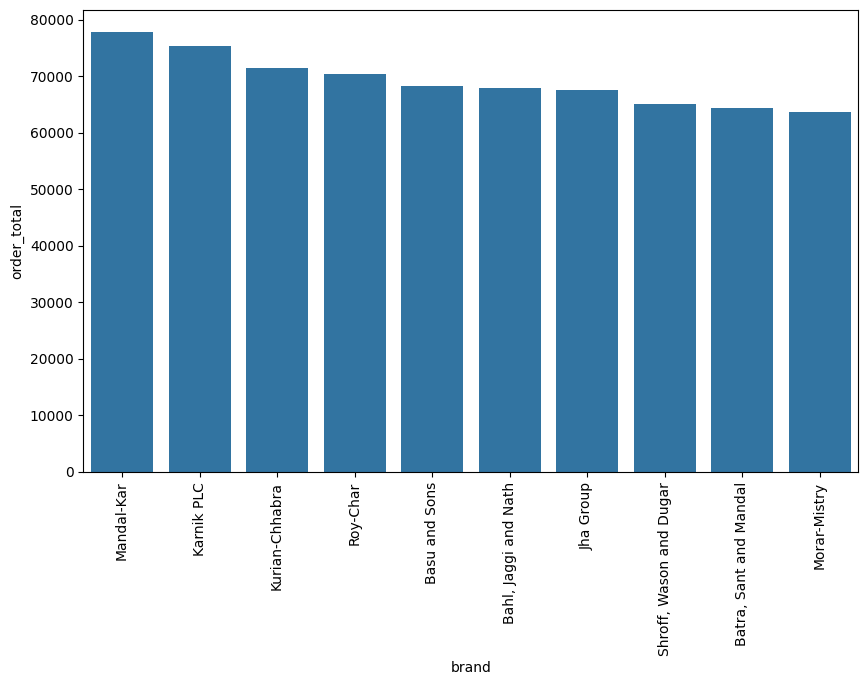

In [36]:
higherRevenGen=(blinkit_orders_summary.groupby('brand').agg({
    'order_total': 'sum'})
    .sort_values(by="order_total",ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(data=higherRevenGen,x='brand',y='order_total')
plt.xticks(rotation=90)
plt.show()

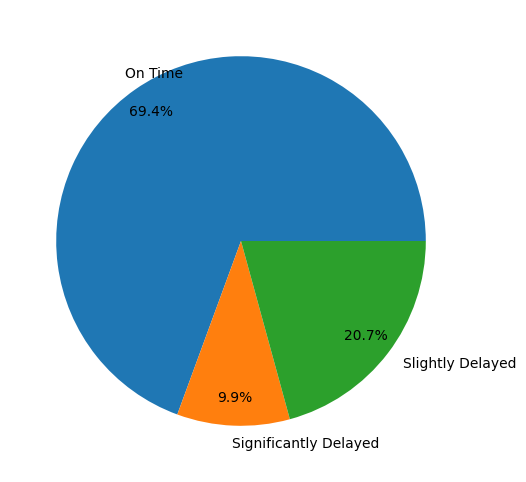

In [28]:
# delivery status of products %
status=(
    orders
    .groupby('delivery_status')
    .agg(total_orders=('order_id', 'size'))
    .assign(percentage=lambda x: x['total_orders']/ x['total_orders'].sum()*100)
    )


In [ ]:
# show margin and price correlation

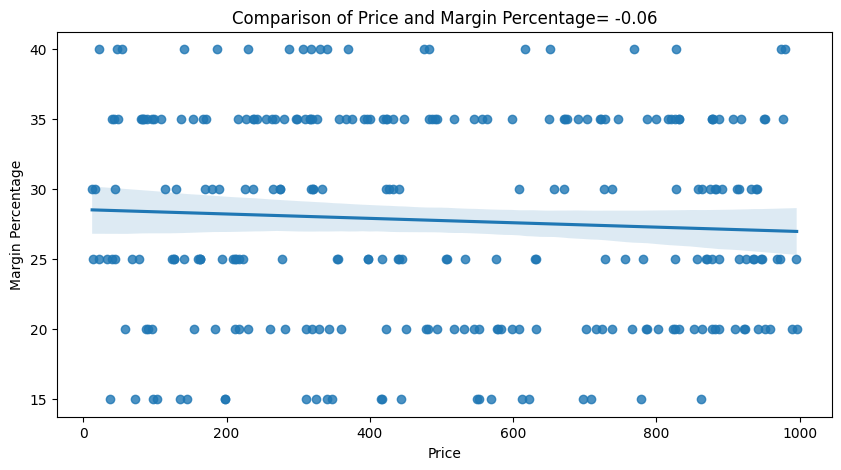

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = np.corrcoef(products['price'], products['margin_percentage'])[0,1]
plt.figure(figsize=(10,5))
sns.regplot(x='price', y='margin_percentage',data=products,)
plt.xlabel('Price')
plt.ylabel('Margin Percentage')
plt.title(f'Comparison of Price and Margin Percentage= {corr:.2f}')
plt.show()

In [31]:
marge_cust_ord=pd.merge(
    customer,
    orders,
    on='customer_id',
    how='inner'
)

In [81]:
def dollor_format(value,pos):
    if value>=1_000_000:
        return f"{value / 1_000_000: .2f}M"
    elif value>=1_000 :
        return f"{value / 1_000: .2f}K"
    else:
        return str(value)

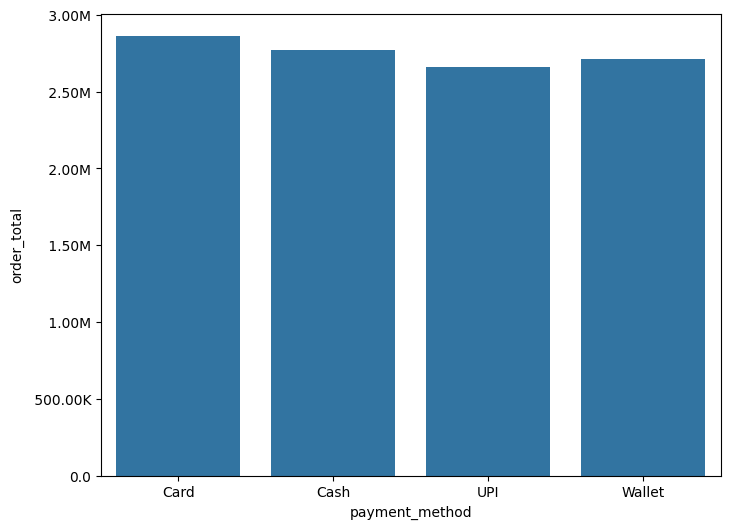

,order_total
payment_method,
Card,2865557.53
Cash,2770463.99
UPI,2658282.71
Wallet,2715004.27


In [82]:
import matplotlib.ticker as mtick
pay_method=marge_cust_ord.groupby('payment_method').agg({'order_total': 'sum'})
pay_method
plt.figure(figsize=(8,6))
ax=sns.barplot(data=pay_method,x='payment_method',y=pay_method.order_total)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollor_format))
plt.show()

In [83]:
customer.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'registration_date',
       'total_orders', 'avg_order_value'],
      dtype='object')

In [101]:
orders.columns

Index(['customer_id', 'product_id', 'order_id', 'quantity', 'order_date',
       'order_total', 'payment_method', 'delivery_status',
       'reasons_if_delayed', 'rating', 'feedback_category', 'sentiment'],
      dtype='object')

In [85]:
products.columns

Index(['product_id', 'product_name', 'category', 'brand', 'mrp', 'price',
       'margin_percentage', 'shelf_life_days'],
      dtype='object')

In [ ]:
9.# percentage of sentimen score 

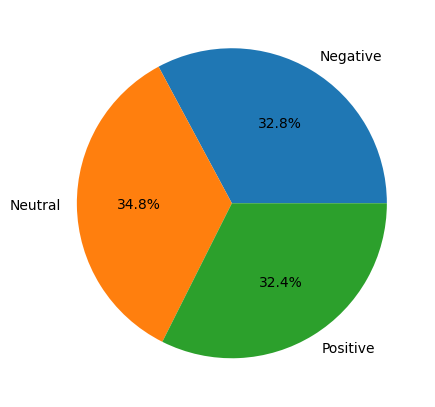

In [100]:
bo=(
    orders
        .groupby('sentiment')
        .agg(total_f=('order_id','size'))
        .assign(percentage=lambda x:x['total_f']/x['total_f'].sum()*100)
        )
    
plt.figure(figsize=(5,8))
plt.pie(bo['percentage'],labels=bo.index,autopct='%0.1f%%')
plt.show()

In [ ]:
# 16 top rated product or brand

In [104]:
tr=blinkit_orders_summary.groupby('product_name').agg({'rating':'mean'})
tr

,rating
product_name,
Baby Food,3.321739
Baby Wipes,3.267045
Bananas,3.111111
Biscuits,3.463415
Bread,3.222222
Butter,3.191781
Carrots,3.250000
Cat Food,3.453947
Cereal,3.000000


In [6]:
%run C:\Users\poora\OneDrive\Desktop\Blinkit\get_ingestion_db.py